In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pyrotd

In [2]:
UVW = np.loadtxt('InputsV2/PHASE_3_STAGE_1_INPUT_v2/01_Signals/CORRECTED_TH_STAT_01.txt',skiprows=1, delimiter=',')
NPCIL = np.loadtxt('Phase2_results/ACCE_STAT_02_CALC_01_TEAM_29_ST_1.txt',skiprows=1, delimiter=',')

In [3]:
# Rotated Time Histories
alpha = 33.3
T = np.eye(3)
T[0,0] = np.cos(np.deg2rad(alpha))
T[1,1] = np.cos(np.deg2rad(alpha))
T = np.eye(3)
T[0,1] = -1*np.sin(np.deg2rad(alpha))
T[1,0] = np.sin(np.deg2rad(alpha))
UVW_rotated = UVW[:,1:] #np.matmul(T,UVW[:,1:].T).T
NPCIL_rotated = np.matmul(T,NPCIL[:,1:].T).T

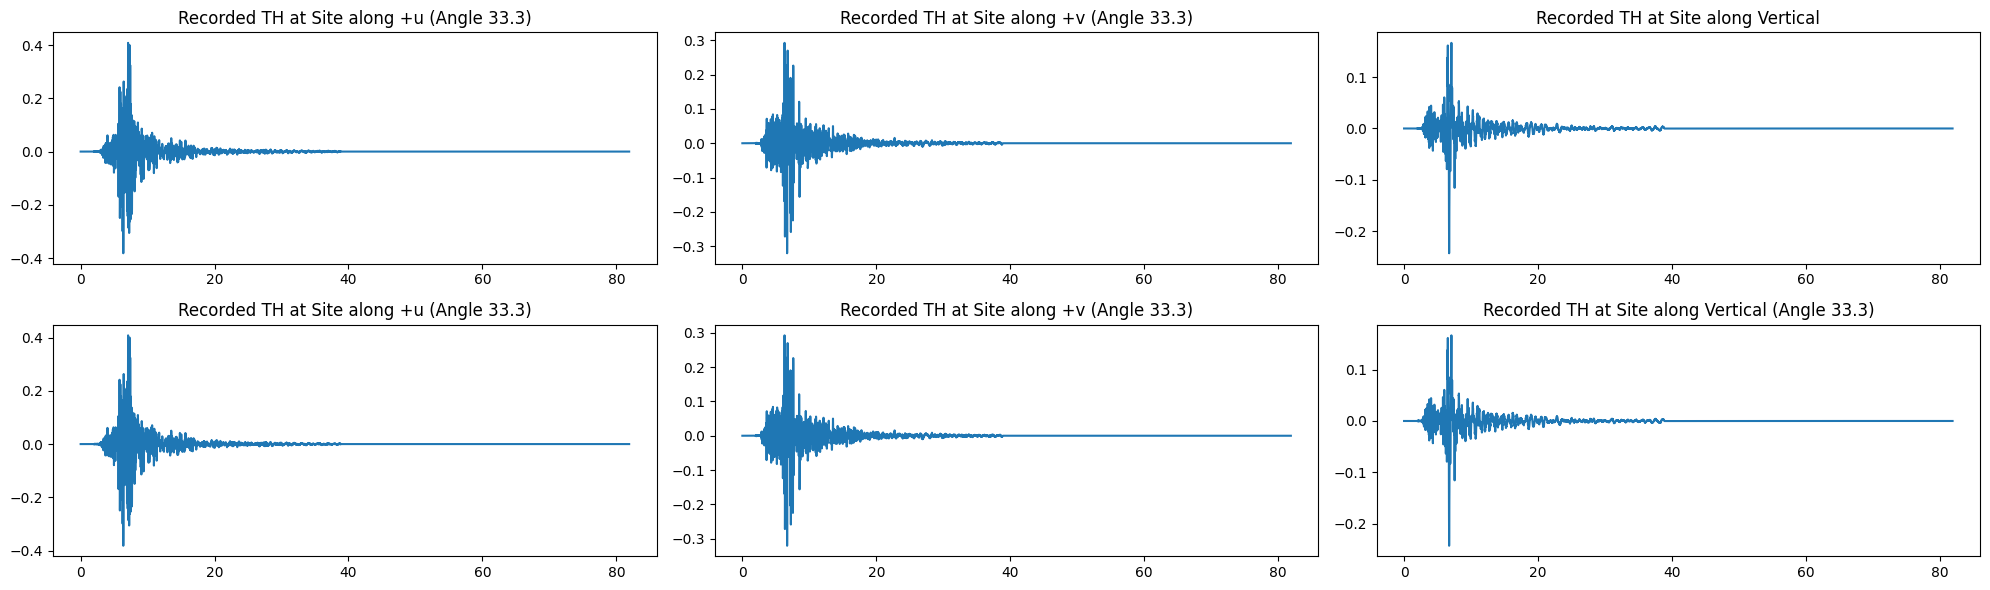

In [4]:
fig, ax = plt.subplots(2,3,figsize=(20,6))
ax[0,0].plot(UVW[:,0],UVW[:,1])
ax[0,1].plot(UVW[:,0],UVW[:,2])
ax[0,2].plot(UVW[:,0],UVW[:,3])
ax[1,0].plot(UVW[:,0],UVW_rotated[:,0])
ax[1,1].plot(UVW[:,0],UVW_rotated[:,1])
ax[1,2].plot(UVW[:,0],UVW_rotated[:,2])
ax[0,0].set_title('Recorded TH at Site along +u (Angle 33.3)')
ax[0,1].set_title('Recorded TH at Site along +v (Angle 33.3)')
ax[0,2].set_title('Recorded TH at Site along Vertical')

ax[1,0].set_title('Recorded TH at Site along +u (Angle 33.3)')
ax[1,1].set_title('Recorded TH at Site along +v (Angle 33.3)')
ax[1,2].set_title('Recorded TH at Site along Vertical (Angle 33.3)')
plt.tight_layout()
plt.savefig('RecordedTH.png')

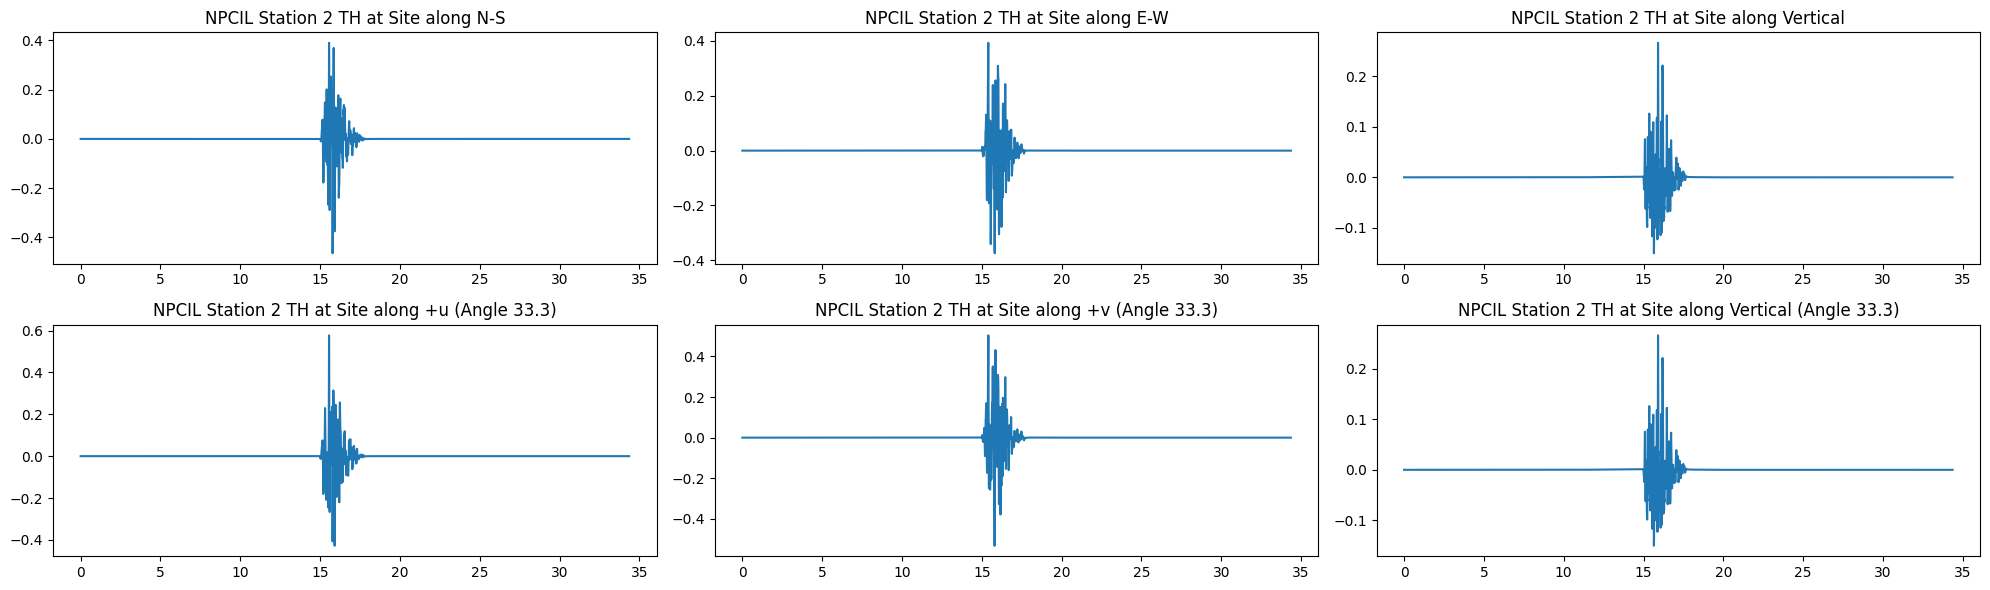

In [5]:
fig, ax = plt.subplots(2,3,figsize=(20,6))
ax[0,0].plot(NPCIL[:,0],NPCIL[:,1])
ax[0,1].plot(NPCIL[:,0],NPCIL[:,2])
ax[0,2].plot(NPCIL[:,0],NPCIL[:,3])
ax[1,0].plot(NPCIL[:,0],NPCIL_rotated[:,0])
ax[1,1].plot(NPCIL[:,0],NPCIL_rotated[:,1])
ax[1,2].plot(NPCIL[:,0],NPCIL_rotated[:,2])
ax[0,0].set_title('NPCIL Station 2 TH at Site along N-S')
ax[0,1].set_title('NPCIL Station 2 TH at Site along E-W')
ax[0,2].set_title('NPCIL Station 2 TH at Site along Vertical')

ax[1,0].set_title('NPCIL Station 2 TH at Site along +u (Angle 33.3)')
ax[1,1].set_title('NPCIL Station 2 TH at Site along +v (Angle 33.3)')
ax[1,2].set_title('NPCIL Station 2 TH at Site along Vertical (Angle 33.3)')
plt.tight_layout()
plt.savefig('NPCIL_TH.png')

In [6]:
osc_damping = 0.05
osc_freqs = np.logspace(-1, 2, 301)

PSAx = pyrotd.calc_spec_accels(0.005, UVW[:,1], osc_freqs, osc_damping).spec_accel
PSAy = pyrotd.calc_spec_accels(0.005, UVW[:,2], osc_freqs, osc_damping).spec_accel
PSAz = pyrotd.calc_spec_accels(0.005, UVW[:,3], osc_freqs, osc_damping).spec_accel

PSAx_rotated = pyrotd.calc_spec_accels(0.005, UVW_rotated[:,0], osc_freqs, osc_damping).spec_accel
PSAy_rotated = pyrotd.calc_spec_accels(0.005, UVW_rotated[:,1], osc_freqs, osc_damping).spec_accel
PSAz_rotated = pyrotd.calc_spec_accels(0.005, UVW_rotated[:,2], osc_freqs, osc_damping).spec_accel

In [7]:
NPCIL_PSAx = pyrotd.calc_spec_accels(0.005, NPCIL[:,1], osc_freqs, osc_damping).spec_accel
NPCIL_PSAy = pyrotd.calc_spec_accels(0.005, NPCIL[:,2], osc_freqs, osc_damping).spec_accel
NPCIL_PSAz = pyrotd.calc_spec_accels(0.005, NPCIL[:,3], osc_freqs, osc_damping).spec_accel

NPCIL_PSAx_rotated = pyrotd.calc_spec_accels(0.005, NPCIL_rotated[:,0], osc_freqs, osc_damping).spec_accel
NPCIL_PSAy_rotated = pyrotd.calc_spec_accels(0.005, NPCIL_rotated[:,1], osc_freqs, osc_damping).spec_accel
NPCIL_PSAz_rotated = pyrotd.calc_spec_accels(0.005, NPCIL_rotated[:,2], osc_freqs, osc_damping).spec_accel

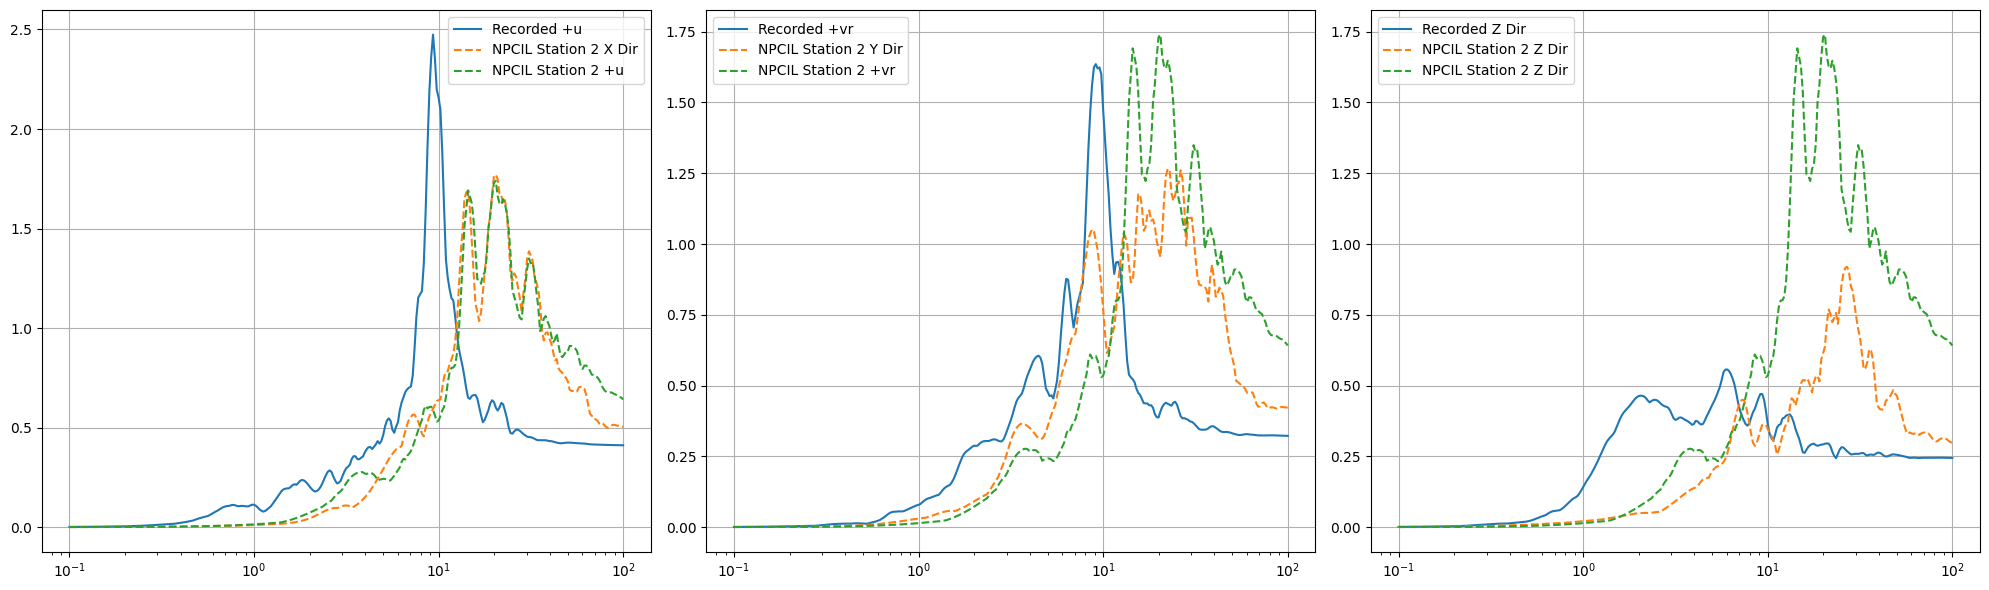

In [8]:
fig, ax = plt.subplots(1,3,figsize=(20,6))

ax[0].semilogx(osc_freqs,PSAx_rotated,label='Recorded +u')
ax[1].semilogx(osc_freqs,PSAy_rotated,label='Recorded +vr')
ax[2].semilogx(osc_freqs,PSAz_rotated,label='Recorded Z Dir')

ax[0].semilogx(osc_freqs,NPCIL_PSAx,label='NPCIL Station 2 X Dir', ls='--')
ax[1].semilogx(osc_freqs,NPCIL_PSAy,label='NPCIL Station 2 Y Dir', ls='--')
ax[2].semilogx(osc_freqs,NPCIL_PSAz,label='NPCIL Station 2 Z Dir', ls='--')

ax[0].semilogx(osc_freqs,NPCIL_PSAx_rotated,label='NPCIL Station 2 +u', ls='--')
ax[1].semilogx(osc_freqs,NPCIL_PSAx_rotated,label='NPCIL Station 2 +vr', ls='--')
ax[2].semilogx(osc_freqs,NPCIL_PSAx_rotated,label='NPCIL Station 2 Z Dir', ls='--')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[0].grid()
ax[1].grid()
ax[2].grid()
fig.tight_layout()
plt.savefig('RecordedPSA.png')

In [9]:
with open('SASSI_ANALYSIS/InputSignals/Recorded_u.ACC','w') as f:
    f.write('{0:13.10f}\n'.format(0.005))
    for val in UVW_rotated[:,0]:
        f.write('{0:13.10f}\n'.format(val/9.81))

with open('SASSI_ANALYSIS/InputSignals/Recorded_v.ACC','w') as f:
    f.write('{0:13.10f}\n'.format(0.005))
    for val in UVW_rotated[:,1]:
        f.write('{0:13.10f}\n'.format(val/9.81))

with open('SASSI_ANALYSIS/InputSignals/Recorded_z.ACC','w') as f:
    f.write('{0:13.10f}\n'.format(0.005))
    for val in UVW_rotated[:,2]:
        f.write('{0:13.10f}\n'.format(val/9.81))

In [10]:
with open('SASSI_ANALYSIS/InputSignals/NPCIL_u.ACC','w') as f:
    f.write('{0:13.10f}\n'.format(0.005))
    for val in NPCIL_rotated[:,0]:
        f.write('{0:13.10f}\n'.format(val/9.81))

with open('SASSI_ANALYSIS/InputSignals/NPCIL_v.ACC','w') as f:
    f.write('{0:13.10f}\n'.format(0.005))
    for val in NPCIL_rotated[:,1]:
        f.write('{0:13.10f}\n'.format(val/9.81))

with open('SASSI_ANALYSIS/InputSignals/NPCIL_z.ACC','w') as f:
    f.write('{0:13.10f}\n'.format(0.005))
    for val in NPCIL_rotated[:,2]:
        f.write('{0:13.10f}\n'.format(val/9.81))